In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier



%matplotlib inline



# load data
#path = "/Users/haohu3/Desktop/DataScience/tts-ds-fundamentals-course-main/datascience/python/12_mod_scikitlearn/data/winequality-red.csv"
wine = pd.read_csv("winequality-red.csv", sep = ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Cleaning data

In [2]:
# check if all the datatypes are numeric
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
# check if there is any nan in the dataset
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Basic Stats and Data Visualizing

In [4]:
# basic stats
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# find out how many quality groups there are 
quaGrps = wine.groupby(by = ["quality"])
quaGrps.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


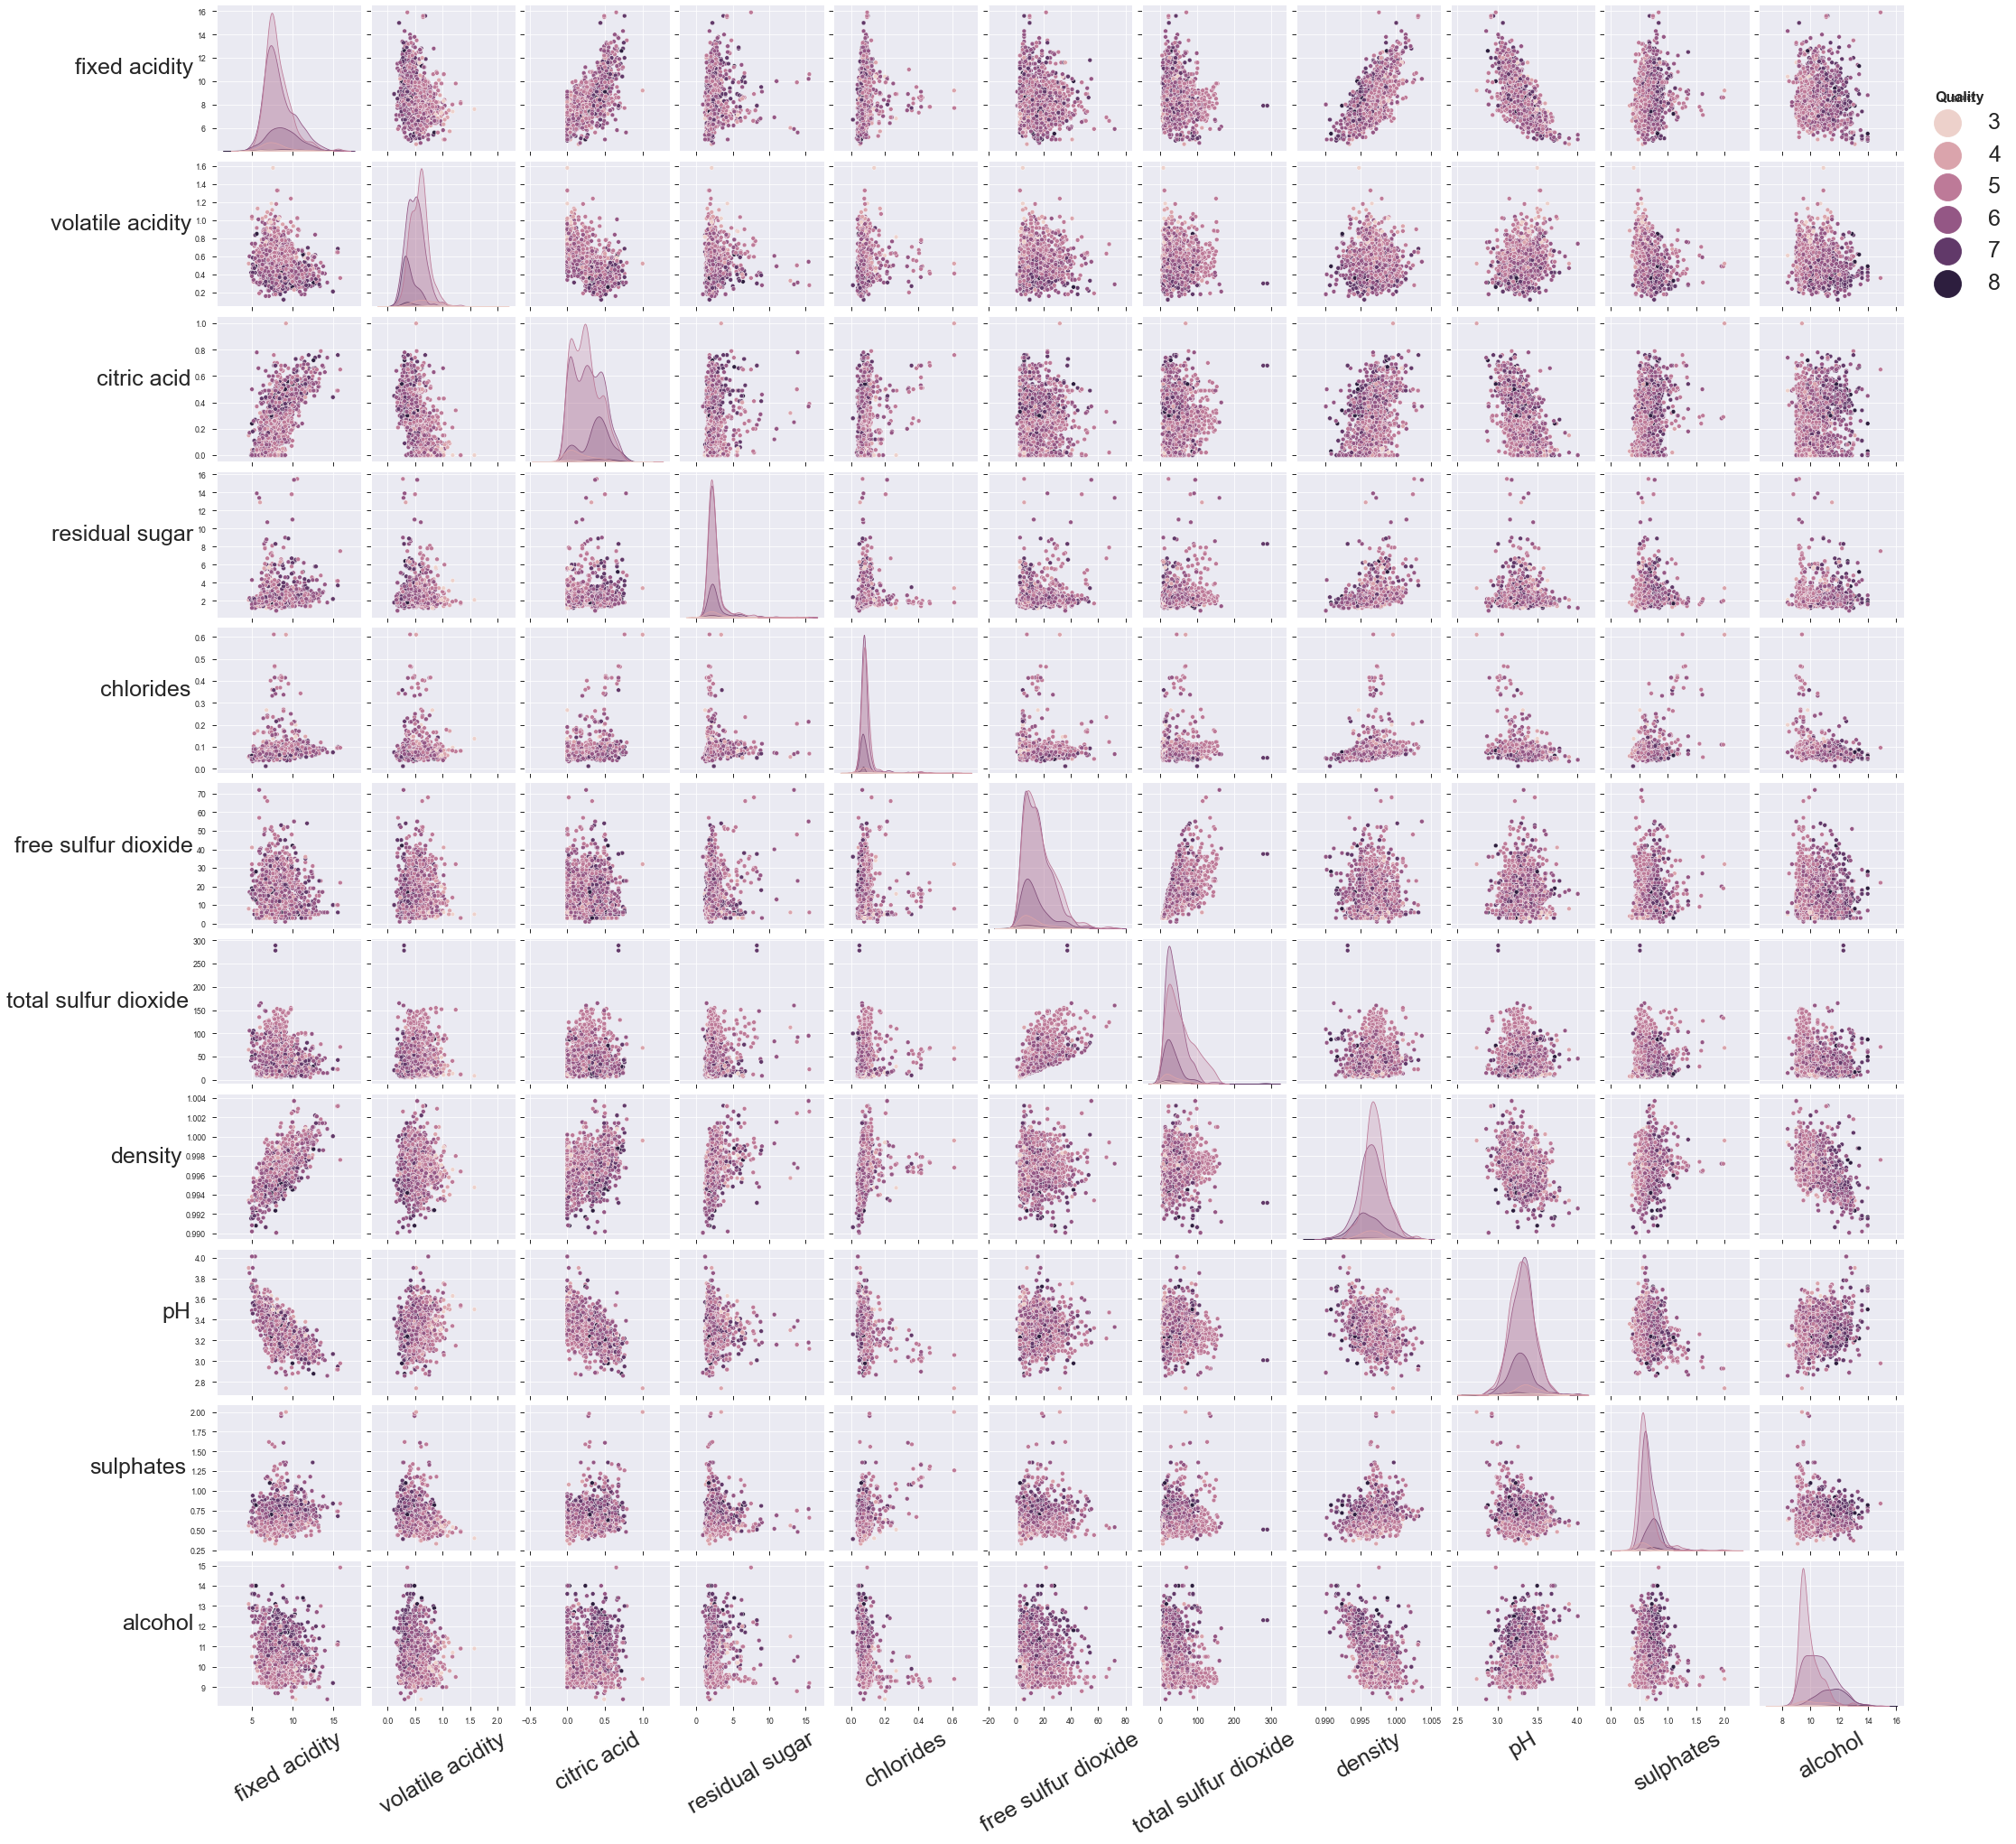

In [13]:
%matplotlib inline


# pair plot to get a rough idea of how related the features are
# this cell takes long time to run 
pair = sns.pairplot(data = wine, hue = "quality")


#add overall title
pair.fig.suptitle('Quality'.title(), 
                 fontsize = 16, fontweight = "bold", x = 1, y = 0.94)


# set legend label size
plt.rc('legend', fontsize= 25, markerscale = 2.5)


# move legend
sns.move_legend(pair, loc = "upper left", bbox_to_anchor=(0.97, 0.95))

# make the label size on axies bigger
sns.set_context("paper", rc={"axes.labelsize":25})

# change directions of label on axies, to make it more readable
for ax in pair.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 30)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.show()

In [25]:
# Create features 
X = wine.loc[:, "fixed acidity":"alcohol"]

# Create target
y = wine["quality"]


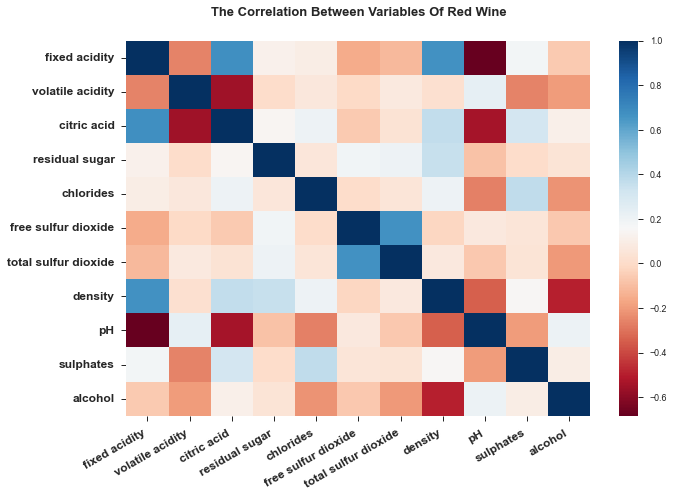

In [15]:
## Heat map to present the correlations between features

correlation = X.corr()

# plot heat map
plt.figure(figsize = (10,7))
sns.heatmap(data = correlation, cmap = "RdBu")

# title
plt.title('the correlation between variables of red wine'.title(), x = 0.5, y = 1.05, 
          fontsize = 13, fontweight = "bold")
# plt.xlabel('Petal Length(cm)', fontsize = 12, fontweight = "bold")
# plt.ylabel('Petal Width(cm)', fontsize = 12, fontweight = "bold")

# set size on x, y-axis label, ha is horizonatal-alignment
plt.xticks(rotation = 30, ha = "right",fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")


plt.tight_layout()
plt.show()


##### Machine Learning

###### Decision Tree

In [26]:
# split data into 80% training data, 20% test data, data is shuffled before applying split
trainx, testx, trainy, testy = train_test_split(X, y, train_size = 0.8, random_state = 0)

# standarize data
scaler = StandardScaler()

# fit on training fetures only
scaler.fit(trainx)

# apply transform to both the training and the test features
trainx = scaler.transform(trainx)
testx = scaler.transform(testx)



In [27]:

# max depth is the number of iterations
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 11, random_state = 1)
dt.fit(trainx, trainy)
predicty = dt.predict(testx)



###### Install the following packages to visualize decision tree
conda install -c anaconda python-graphviz <br>

conda install -c anaconda pydot

In [12]:
# visulize  decision tree, unsolved yet, touble with install packages
import graphviz 
dot_data = tree.export_graphviz(dt, out_file = None, 
                               feature_names= X.columns,
                               class_names = y.unique().astype(str), 
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph

ModuleNotFoundError: No module named 'graphviz'

In [28]:
# calculate feature importance, which is already done by decision tree, here is just print it out
# this code can only be run once per time, or it will add feature importance more than once
# clear cell output befoe rerun it
final_fi = pd.DataFrame()
for i, column in enumerate(X):
    print("Importance of feature {}:, {:.3f}".format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({"Variable": [column], "Feature Importance Score": [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi, fi], ignore_index = True)
    except:
        final_fi = fi
    
# ordering the data
final_fi = final_fi.sort_values("Feature Importance Score", ascending = False).reset_index()
final_fi = final_fi.drop(columns = ["index"])



Importance of feature fixed acidity:, 0.058
Importance of feature volatile acidity:, 0.103
Importance of feature citric acid:, 0.065
Importance of feature residual sugar:, 0.064
Importance of feature chlorides:, 0.092
Importance of feature free sulfur dioxide:, 0.067
Importance of feature total sulfur dioxide:, 0.078
Importance of feature density:, 0.061
Importance of feature pH:, 0.078
Importance of feature sulphates:, 0.144
Importance of feature alcohol:, 0.191


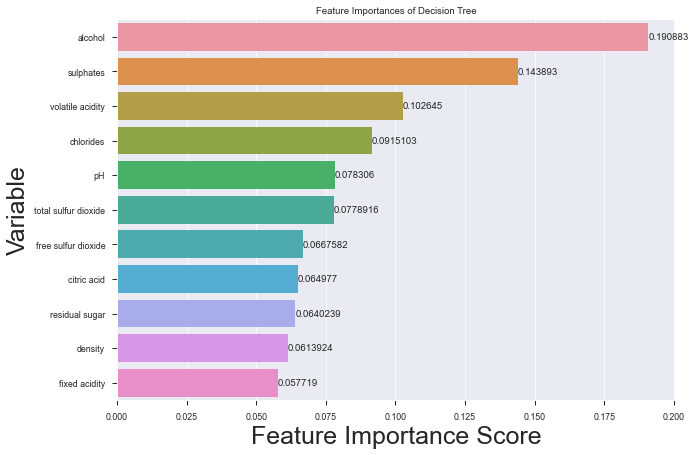

In [29]:
# make a bar plot of importance of features of decision tree

plt.figure(figsize = (10,7))
ax = sns.barplot(data = final_fi, x = "Feature Importance Score", y = "Variable")
plt.title('Feature Importances of Decision Tree')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [30]:
# evaluate accuracy on Decison Tree, not the only factor that is important
# Accuracy on Train
print("Training Accuracy is: % .2f%%" % (dt.score(trainx, trainy)*100))

# Accuracy on Testing
print("Test Accuracy is: % .2f%%" % (dt.score(testx, testy)*100))

#accuracy test with accuracy_score
accuracy = accuracy_score(testy, predicty)

print("The accuracy obtained with accuracy_score is  {:.2f} %.".format(accuracy * 100))

Training Accuracy is:  93.04%
Test Accuracy is:  61.25%
The accuracy obtained with accuracy_score is  61.25 %.


In [31]:
# Confusion Matrix function
# define a plot function for confusion matrix
def plot_confusion_matrix(cm, classes = None, title = "Confusion Matrix"):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, 
                    vmin = 0., vmax = 1., annot = True, annot_kws = {"size": 12})
    else:
        sns.heatmap(cm, vmin = 0., vmax = 1.)
        
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted label")


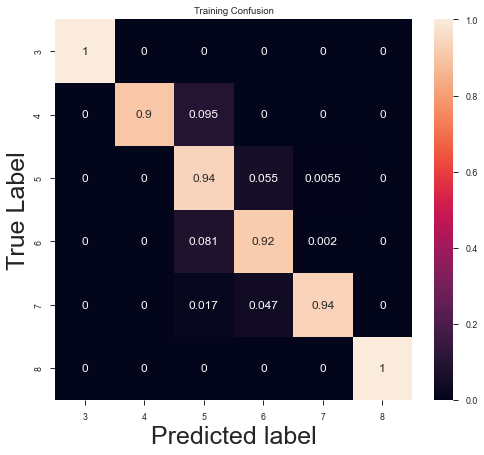

In [32]:
y_pred =  dt.predict(trainx)

# plotting confusion matrix
cm = confusion_matrix(trainy, y_pred)
cm_norm = cm/cm.sum(axis = 1)[:, np.newaxis]
plt.figure(figsize = (8, 7))
plot_confusion_matrix(cm_norm, classes = dt.classes_, title = "Training Confusion")

###### Random Forest <br> 
Another solution for getting feature importance:  will run many trees randomly and make a decision 


In [33]:
# split data into 80% training data, 20% test data, data is shuffled before applying split
trainx, testx, trainy, testy = train_test_split(X, y, train_size = 0.8, random_state = 0)

# standarize data
scaler = StandardScaler()

# fit on training fetures only
scaler.fit(trainx)

# apply transform to both the training and the test features
trainx = scaler.transform(trainx)
testx = scaler.transform(testx)

In [35]:
#n_estimators defines how many trees in the forest we will run 
rf = RandomForestClassifier(n_estimators=200, criterion="entropy", random_state= 0)
rf.fit(trainx, trainy)
prediction_test = rf.predict(X = testx)

# print the accuracy on train
print("Training Accuracy is: ", rf.score(trainx, trainy))

# print the accuracy on test
print("Testing Accuracy is: ", rf.score(testx, testy))

# print the feature importance matrix
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]



# iterate through all the columns in X
for i in range(X.shape[1]):
   
    print ("%2d) %-*s %f" % (i + 1, 30, X.columns[i],importances[indices[i]]))



Training Accuracy is:  1.0
Testing Accuracy is:  0.71875
 1) fixed acidity                  0.152296
 2) volatile acidity               0.119785
 3) citric acid                    0.112520
 4) residual sugar                 0.097938
 5) chlorides                      0.090065
 6) free sulfur dioxide            0.077896
 7) total sulfur dioxide           0.076341
 8) density                        0.072170
 9) pH                             0.070223
10) sulphates                      0.067562
11) alcohol                        0.063204


In [36]:
# create a data frame on the importance result
imdf= pd.DataFrame()
imdf["features"] = X.columns
imdf["importances"] = importances[indices]
imdf = imdf.sort_values(by = ["importances"])
imdf

,features,importances
10,alcohol,0.063204
9,sulphates,0.067562
8,pH,0.070223
7,density,0.072170
6,total sulfur dioxide,0.076341
5,free sulfur dioxide,0.077896
4,chlorides,0.090065
3,residual sugar,0.097938
2,citric acid,0.112520
1,volatile acidity,0.119785


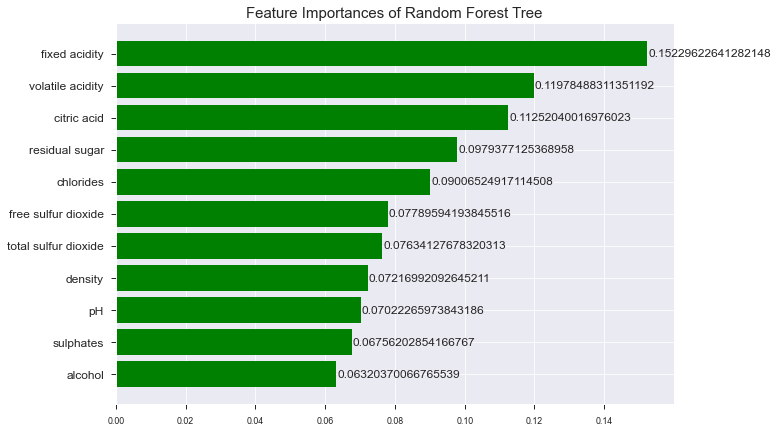

In [37]:
# plot feature importance of forest tree
y = imdf["features"]
x = imdf["importances"]

plt.figure(figsize = (10,7))
plt.title('Feature Importances of Random Forest Tree', fontsize = 15)
bars = plt.barh(y, x, color="green")

# add values on bars, padding is distance from bars
plt.bar_label(container = bars, labels = imdf["importances"], padding = 1, fontsize = 12)


plt.yticks(fontsize = 12)
plt.show()

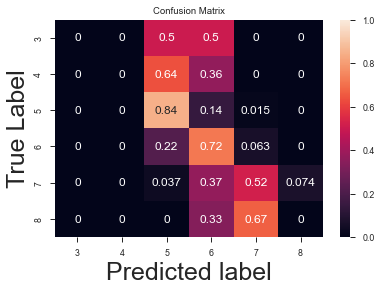

In [38]:
# confusion matrix
rfcm = confusion_matrix(testy, prediction_test)
rfcm_norm = rfcm/rfcm.sum(axis = 1)[:, np.newaxis]
plt.figure
plot_confusion_matrix(rfcm_norm, classes = rf.classes_)

Trying to tuning the model to achieve better result

Classification accuracy on test set with max features = 1 and max_depth = None: 0.741
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.613
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.628
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.625
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.650
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.700
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.609
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.622
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.637
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.659
Classification accuracy on test set with max features = log2 and max_depth = None: 0.700
Classification accuracy on test set with max features = log2

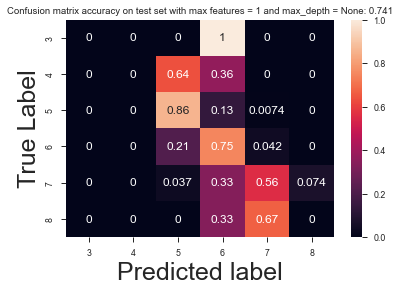

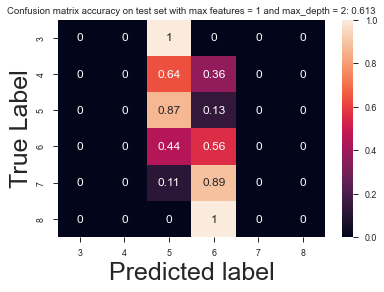

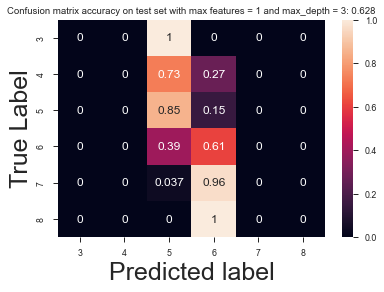

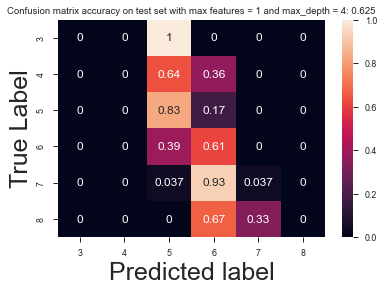

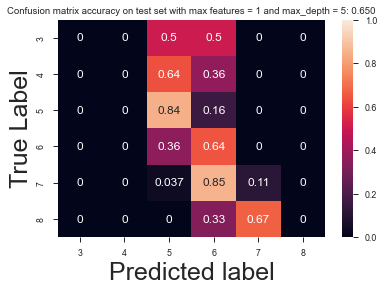

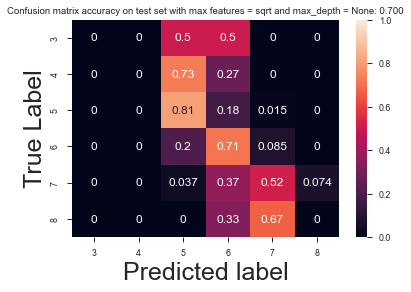

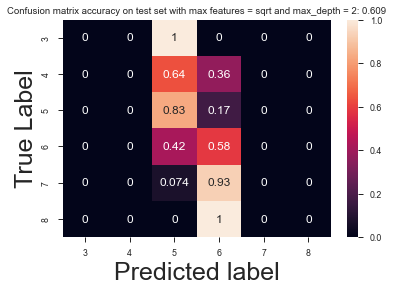

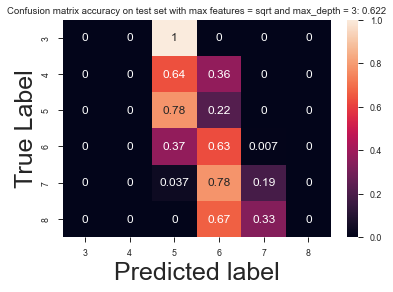

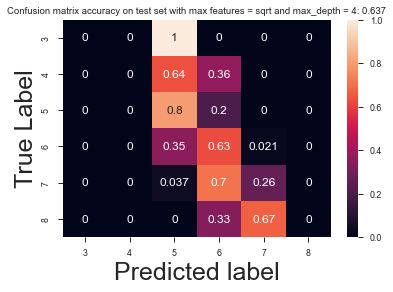

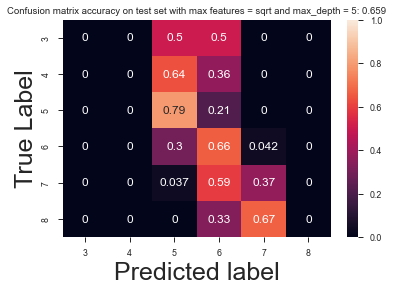

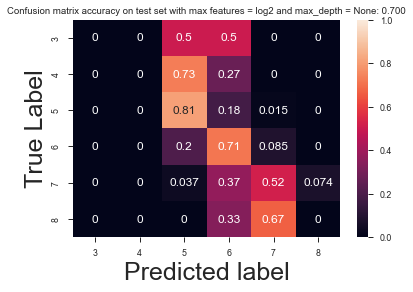

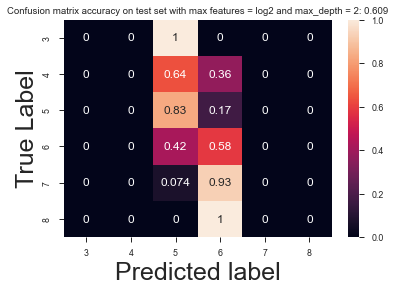

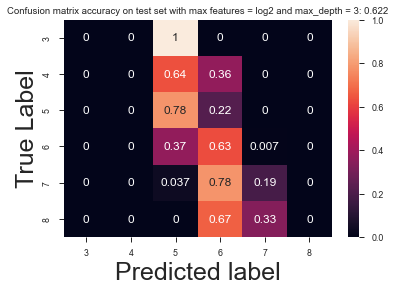

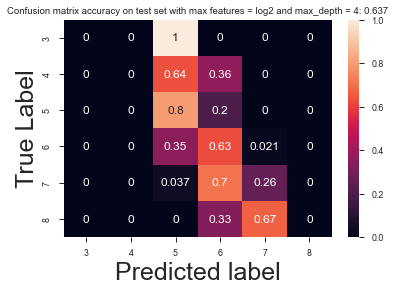

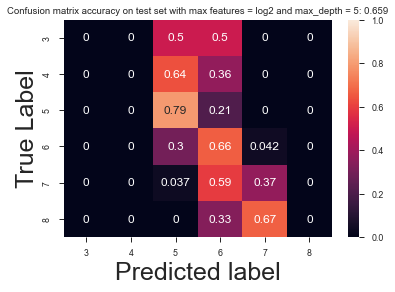

In [39]:
# since the confusion matrix doesn't look good, we need to tune the random forest

from itertools import product
# number of trees
n_estimators = 100
# number of features to consider when looking for the best split
max_features = [1, "sqrt", "log2"]
# max deepth of the tree
max_depths = [None, 2, 3, 4, 5]

# with product we can iterate through all possible combinations
for f, d in product(max_features, max_depths):
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion = "entropy",
                                max_features= f,
                                max_depth=d,
                                n_jobs=2,
                                random_state = 1337)
    rf.fit(trainx, trainy)
    prediction_test = rf.predict(X = testx)
    print("Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}".format(f, d, accuracy_score(testy, prediction_test)))
    
    cm = confusion_matrix(testy, prediction_test)
    cm_norm = cm/cm.sum(axis = 1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes = rf.classes_,
                         title= "Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}".format(f, d, accuracy_score(testy, prediction_test)))

In [ ]:
#result: the first combination, max features = 1, max_depth = None
#has a little improvement on test accuracy and confusion matrix


###### Xgboost

In [1]:
!pip install xgboost

In [4]:
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# load data
wine = pd.read_csv("winequality-red.csv", delimiter=';')

# spliting
X = wine.loc[:, "fixed acidity":"alcohol"]
Y = wine['quality']


In [5]:
# Test the accuracy on different random state within 100
seed = 5
test_size = 0.33

for i in range(100):
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=i)
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    Y=le.fit_transform(Y)
    




    # fit model no training data
    model = XGBClassifier()
    model.fit(X_train, y_train)


    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]


    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Random State is % d, Accuracy: %.2f%%" % (i, accuracy * 100.0))

Random State is  0, Accuracy: 0.57%
Random State is  1, Accuracy: 66.48%
Random State is  2, Accuracy: 61.74%
Random State is  3, Accuracy: 70.27%
Random State is  4, Accuracy: 64.02%
Random State is  5, Accuracy: 67.80%
Random State is  6, Accuracy: 66.48%
Random State is  7, Accuracy: 64.77%
Random State is  8, Accuracy: 67.80%
Random State is  9, Accuracy: 66.67%
Random State is  10, Accuracy: 64.02%
Random State is  11, Accuracy: 65.53%
Random State is  12, Accuracy: 68.37%
Random State is  13, Accuracy: 63.07%
Random State is  14, Accuracy: 65.72%
Random State is  15, Accuracy: 65.91%
Random State is  16, Accuracy: 61.74%
Random State is  17, Accuracy: 65.91%
Random State is  18, Accuracy: 66.48%
Random State is  19, Accuracy: 68.18%
Random State is  20, Accuracy: 67.42%
Random State is  21, Accuracy: 65.53%
Random State is  22, Accuracy: 66.86%
Random State is  23, Accuracy: 67.23%
Random State is  24, Accuracy: 68.75%
Random State is  25, Accuracy: 67.23%
Random State is  26, Ac

In [6]:
# took the seed number with the max accuracy on the test above, which is 50
seed = 50
test_size = 0.20

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
Y=le.fit_transform(Y)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.75%


#### Logistic Regression

In [63]:
# Create features 
X = wine.loc[:, "fixed acidity":"alcohol"]

# Create target
y = wine["quality"]


# split data into 80% training data, 20% test data, data is shuffled before applying split
trainx, testx, trainy, testy = train_test_split(X, y, train_size = 0.8, random_state = 0)

# standarize data
scaler = StandardScaler()

# fit on training fetures only
scaler.fit(trainx)

# apply transform to both the training set and the test features
trainx = scaler.transform(trainx)
testx = scaler.transform(testx)


In [64]:
# make an instance of the model
# make the model choose the minimum number of principal components so that 95% of the variance is retained
pca = PCA(0.95)
# pca = PCA(n_components = 4)
# #n_components = 4
# fitting PCA on trainx only
pca.fit(trainx)

#this can be used after fitting the data, find out how many componets are chosen
k = pca.n_components_

# apply the mapping(transform) to both the training and test features
trainx = pca.transform(trainx)
testx = pca.transform(testx)


In [53]:
# apply model, Logistic Regression
# make an instance of the model
# default solver is slow when have large dataset, so "lbfgs" is commonly chosen, solver = "lbfgs"
logisticRegr = LogisticRegression(solver = "lbfgs")
# logisticRegr = LogisticRegression(random_state = 0, penalty = 'l1')


# training the mode on the data, 
# model is learning relationships between x features and y species(target or lables)
logisticRegr.fit(trainx, trainy)

#Predic the labels of new data, using the information the model learned during the model training process

predicy = logisticRegr.predict(testx)

#check accuracy
accuracy = accuracy_score(testy, predicy)

print("When 0.95 of variance is retained, {} principle components are chosen, the accuracy of Logistic\
Regression after PCA is {:.2f} %.".format(k, accuracy * 100))


When 0.95 of variance is retained, 9 principle components are chosen, the accuracy of LogisticRegression after PCA is 61.88 %.


In [54]:
# Accuracy on Training
print("Training Accuracy is: %.2f%%" % (logisticRegr.score(trainx, trainy)*100))

# Accuracy on Testing
print("Test Accuracy is: %.2f%%" % (logisticRegr.score(testx, testy)*100))

Training Accuracy is: 59.27%
Test Accuracy is: 61.88%


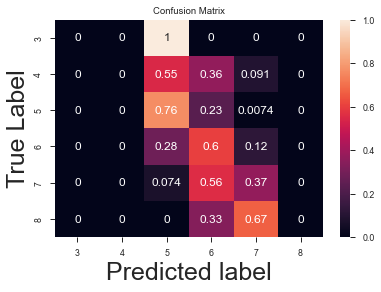

In [55]:
# confusion matrix
lr = confusion_matrix(testy, predicy)
lr_norm = lr/lr.sum(axis = 1)[:, np.newaxis]
plt.figure
plot_confusion_matrix(lr_norm, classes = logisticRegr.classes_)

Sources used to help our understanding:

https://github.com/aniruddhachoudhury/Red-Wine-Quality/blob/master/Wine%20ML%20model.ipynb

https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/